In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 1. Получите и загрузите данные

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества

In [4]:
df_1 = data[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     714 non-null    int64  
 2   Parch     714 non-null    int64  
 3   Fare      714 non-null    float64
 4   Survived  714 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [5]:
X = df_1[['Age', 'SibSp', 'Parch', 'Fare']]
y = df_1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
preds_1 = model_1.predict(X_test)

model_1_report = classification_report(y_test, preds_1)
print(model_1_report)

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        87
           1       0.77      0.30      0.44        56

    accuracy                           0.69       143
   macro avg       0.73      0.62      0.61       143
weighted avg       0.71      0.69      0.65       143



### 3. Снова загрузите полные данные

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте
`PassengerId` - удаляем, так как это уникальный ID пассажира, необходимый для его идентификатции внутри датасета, но не несущий в себе никакой информации о характеристиках самого пассажира.

`Ticket` - номер билета пассажира - это еще один идентификатор. Он может повторяться у некоторых пассажиров, но в целом большинство значений уникальны. Нет смысла делить пассажиров на большое число категорий по этому признаку, так как у нас есть гораздо более информативные параметры. Поэтому удаляем.

`Cabin` - номер каюты пассажира. Удаляем, так как в этом столбце очень много пропущенных значений. Кроме того, для нашей задачи будет достаточно имеющейся информации о классе билета пассажира.

In [7]:
df = data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 5. Проверьте данные на наличие пропущенных значений.
- a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
- b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
1 - df.dropna().shape[0] / df.shape[0]

0.2008978675645342

В датасете есть 2 столбца с пропущенными значениями. В столбце `Age` присутствует 714 значений из 891. В столбце `Embarked` с информацией о порте посадки пассажира пропущено всего 2 значения. При простом удалении пропусков будет потеряно 20% информации.

Для начала заполним пропущенные значения в столбце `Embarked`. Пропущенных значения всего 2, поэтому заполним их модой.

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Заполним пропущенные значения в столбце `Age` в зависимости от того, какая форма обращения указана для пассажира в его имени `['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.']`. Известно, что это зависит от семейного и социального статуса человека, а значит и от его возраста. Будем заполнять средними значениями для каждой из категорий.

In [11]:
name_titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.']

for title in name_titles:
    avg_age = round(df[df['Name'].str.contains(title, regex=False)]['Age'].mean())
    df['Age'] = df.apply(lambda row: avg_age if
                             np.isnan(row['Age']) and title in row['Name']
                             else row['Age'], axis=1)

**Еще раз проверим есть ли пропущенные значения. Убедившись можно избавиться от столбца с именами пассажиров.**

In [12]:
df.isna().value_counts()

Survived  Pclass  Name   Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False  False       891
dtype: int64

In [13]:
df = df.drop('Name', axis=1)

### 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### 7. Проверьте данные на наличие выбросов.
- a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.718485,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.260004,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


На наличие выбросов имеет смысл проверить столбцы с количественными переменными, такие как `Age, SibSp, Parch, Fare`.

`Age` - диапазон значений от 0.42 до 80 лет. Не похоже, что здесь есть выбросы.

`SibSp` - близкие родственники и/или супруг пассажира на корабле. Диапазон значений от 0 до 8. Большие семьи не редкость в то время, люди перемещались в Новый Свет за лучшей жизнью, логично предположить, что делали они это скоординированно. Сомневаюсь, что здесь могут быть выбросы.

`Parch` - дети, или родители пассажира на корабле. Диапазон значений от 0 до 6. Аналогично предыдущему пункту законамерно предположить, что здесь также нет выбросов.

`Fare` - самый большой размах значений в столбце со стоимостью билета. Здесь диапазон от 0 до 512 у.е. Должно быть люди с нулевой стоимостью билетов - это состав экипажа корабля. Можно попробовать исследовать визуально есть ли выбросы в стоимости других билетов.

### 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

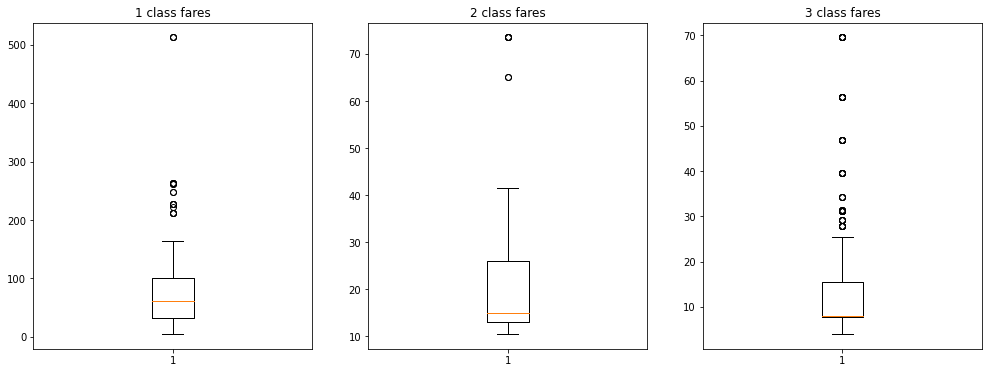

In [16]:
df_fares = df[df['Fare'] != 0]
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

for i in range(3):
    axs[i].boxplot(df_fares[df_fares['Pclass'] == i+1]['Fare'])
    axs[i].title.set_text(f'{i+1} class fares')

plt.show()

Глядя на построенные боксплоты с распределениями стоимостей билетов можно заметить, что в каждом из них наблюдаются выбросы. Но это лишь по мнению алгоритма построения графиков. Мы знаем, что стоимость относится к конкретному номеру билета, а не обязательно к конкретному пассажиру. То есть по одному билету могли путешествовать несколько пассажиров. В таком случае естественно наблюдать такой большой разброс значений и наличие выбросов. Тем не менее для нашей задачи это может сыграть на понижение качества построенной модели, так как она будет переобучаться на столбце `Fare`, не учитывая что во многих случаях стоимость нужно делить между несколькими пассажирами. Делить дополнительно пассажиров по категориям в зависимости от номера билета я считаю сейчас нецелесообразным, так как у нас уже есть разделение по классам обслуживания. Исходя из этого принимаю решение избавиться от параметра `Fare`.

In [17]:
df = df.drop('Fare', axis=1)

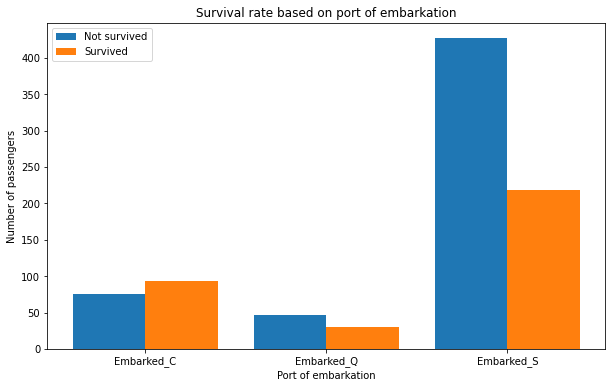

In [18]:
df_ports = df.groupby('Survived').sum()[['Embarked_C', 'Embarked_Q', 'Embarked_S']]
plt.figure(figsize=(10,6))
X_axis = np.arange(3)

plt.bar(X_axis - 0.2, df_ports.iloc[0], 0.4, label='Not survived')
plt.bar(X_axis + 0.2, df_ports.iloc[1], 0.4, label='Survived')

plt.xticks(X_axis, df_ports.columns)
plt.xlabel('Port of embarkation')
plt.ylabel('Number of passengers')
plt.title('Survival rate based on port of embarkation')
plt.legend()
plt.show()

На столбчатом графике выше можно заметить, что есть существенное различие в уровне выживаемости пассажиров в зависимости от того, в каком порту они сели на корабль. Исходя из этого можно предположить, что мы не зря оставили для обучения модели столбец `Embarked`.

### 9. Попробуйте математически преобразовать признак Age

In [19]:
conditions = [df['Age'].between(0, 14.99),
              df['Age'].between(15, 29.99),
              df['Age'].between(30, 44.99),
              df['Age'] >= 45]

choices = ['child', 'young_adult', 'adult', 'elder']

df['Age_class'] = np.select(conditions, choices)

In [20]:
df = pd.get_dummies(df, columns=['Age_class']).drop('Age', axis=1)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_class_adult,Age_class_child,Age_class_elder,Age_class_young_adult
0,0,3,1,0,0,1,0,0,1,0,0,0,1
1,1,1,1,0,1,0,1,0,0,1,0,0,0
2,1,3,0,0,1,0,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1,1,0,0,0
4,0,3,0,0,0,1,0,0,1,1,0,0,0


### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику

In [21]:
X = df.iloc[:,1:]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_test)

print(classification_report(y_test, preds_2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



**Вспомним какими получились метрики у модели, обученной на минимально обработанных данных**

In [22]:
print(model_1_report)

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        87
           1       0.77      0.30      0.44        56

    accuracy                           0.69       143
   macro avg       0.73      0.62      0.61       143
weighted avg       0.71      0.69      0.65       143



### 11. Сформулируйте выводы по проделанной работе.
- a) Кратко опишите какие преобразования были сделаны и почему.

О своих преобразованиях датасета я уже подробно написал в предыдущих пунктах.

- b) Сравните метрики моделей из п. 2 и п. 10.

После обработки признаков качество работы модели заметно выросло. Подросли все обобщающие метрики, такие как F1-мера для каждого из классов, точность(accuracy) в целом, а также макро-усредненная и усредненная по весу точность. Особенно заметно, что на сырых данных модель слабо обнаруживала 1 класс, то есть выживших пассажиров. Метрика recall для этого класса была лишь `0.30`. На доработанных данных recall для 1 класса получился уже `0.76`. Именно это улучшение и потянуло за собой вверх все остальные обобщенные метрики, несмотря на то, что recall для 0 класса немного просел с `0.94` до `0.84`.

- c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для меня совершенно очевидно, что прежде, чем начиинать строить модель машинного обучения необходимо разобраться во входных данных. Данные могут быть объективно некачественными за счет наличия пропусков, выбросов, неоднозначности или неоднородности. В таком случае обработка данных будет обязательной задачей, предваряющей построение модели. Необходимость дальнейших преобразований должна быть обусловлена поставленной задачей, а также выбранной методикой работы. Любое преобразование должно служить определенной цели, а не являться обязательным по своей сути.

Что касается "действительно больших данных", то все написанное выше я отношу и к ним тоже. Необходимо обеспечить минимальное качество входных данных. Делать это можно более, или менее трудозатратными либо автоматизированными способами, в зависимости от требуемой степени погруженности специалиста в эти данные. Все дополнительные преобразования должны проистекать из природы поставленной задачи, и из того, что планируется получить на выходе.